# PCA IMPLEMENT


In [121]:
import pandas as pd
import numpy as np
import scipy as sp
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline  

### Data

In [122]:
df_power = []
for i in range(1,11):
    df_power_zone = pd.read_csv('../data/Task 15/Task15_W_Zone1_10/Task15_W_Zone'+str(i)+'.csv', 
                                header=0, 
                                usecols=[1, 2], 
                                names=['datetime', 'wf'+str(i)])
    df_power_zone['datetime'] = pd.to_datetime(df_power_zone['datetime'], format='%Y%m%d %H:%M')
    df_power_zone.index = df_power_zone['datetime']
    df_power_zone = df_power_zone.drop(['datetime'], axis=1)
    df_power.append(df_power_zone)
df_power = pd.concat(df_power, axis=1, join='outer')

In [123]:
print(df_power.index[0])
print(df_power.index[-1])
df_power.head()

2012-01-01 01:00:00
2013-12-01 00:00:00


,wf1,wf2,wf3,wf4,wf5,wf6,wf7,wf8,wf9,wf10
datetime,,,,,,,,,,
2012-01-01 01:00:00,0.000000,0.596273,0.425465,0.378229,0.273678,0.268101,0.000000,0.000000,0.0,0.594361
2012-01-01 02:00:00,0.054879,0.411180,0.363851,0.063012,0.086796,0.034542,0.014708,0.014954,0.0,0.569679
2012-01-01 03:00:00,0.110234,0.167243,0.297129,0.036704,0.006811,0.020621,0.035098,0.071785,0.0,0.330539
2012-01-01 04:00:00,0.165116,0.037326,0.235438,0.034342,0.018646,0.001867,0.045055,0.066796,0.0,0.211308
2012-01-01 05:00:00,0.156940,0.051206,0.120904,0.033554,0.034812,0.015174,0.050160,0.034797,0.0,0.172140


### Clean data

In [130]:
df_power = df_power.fillna(method='ffill')
df_power.isnull().sum()
df_power.index.duplicated().sum()

0

In [131]:
df_ideal = pd.DatetimeIndex(start=df_power.index[0], end=df_power.index[-1], freq='1H')
missing = df_ideal.shape[0]-df_power.shape[0]
missing

C:\Users\semal\Anaconda3.3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  """Entry point for launching an IPython kernel.


0

### Implement PCA

In [132]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(df_power)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['1','2','3','4','5','6','7','8','9','10'])

In [133]:
print(principalDf.index[0])
print(principalDf.index[-1])
principalDf.head()

0
16799


,1,2,3,4,5,6,7,8,9,10
0,-0.328516,-0.463167,0.316811,-0.142951,0.135855,0.173756,-0.128829,-0.048238,-0.026769,-0.007224
1,-0.662729,-0.208988,0.384072,-0.231647,-0.018784,0.079160,-0.091547,0.012694,0.030739,0.024172
2,-0.829239,-0.016846,0.177163,-0.088464,-0.072627,0.058618,-0.106601,0.016585,-0.020649,0.055455
3,-0.902277,0.057578,0.041894,-0.015186,-0.093811,0.033344,-0.129232,0.055808,0.000320,0.075814
4,-0.940027,0.023823,-0.043194,-0.046991,-0.041440,-0.007924,-0.112020,0.079387,0.004167,0.059318


In [136]:
print(pca.components_)

[[ 2.92704641e-01  2.33336563e-01  2.61155653e-01  3.91771153e-01
   3.94595762e-01  3.98613244e-01  2.62739062e-01  2.55146287e-01
   2.74366136e-01  3.37912087e-01]
 [ 4.13371416e-01 -1.46750943e-01  1.90495886e-01 -2.36823322e-01
  -2.93122532e-01 -2.82829582e-01  4.08151545e-01  4.20282858e-01
   3.05251437e-01 -3.36001591e-01]
 [-1.59049490e-01  2.99758846e-01  6.26815993e-01 -2.45463784e-01
  -2.72435723e-01 -2.46145811e-01 -1.67285821e-01 -1.89633404e-01
   2.36246887e-01  4.20868373e-01]
 [-1.90090933e-01 -4.68637686e-01  4.97904123e-01  1.88951541e-01
   1.92285194e-01  1.89303753e-01 -1.92154315e-01 -2.26967755e-01
   2.80050646e-01 -4.70061106e-01]
 [-2.48322278e-02  7.09242608e-01 -1.67328921e-01  2.12084791e-01
  -2.74619438e-02 -8.86359546e-02 -1.02519931e-01 -1.66127885e-01
   3.34453554e-01 -5.14588065e-01]
 [ 9.55288205e-02  2.85059198e-01  4.74588155e-01  3.10525498e-02
   4.05961788e-02  4.51503497e-02  6.51914896e-02  1.10123497e-01
  -7.55977246e-01 -3.03070957e-01

In [137]:
print(pca.explained_variance_)


[0.54935535 0.15696518 0.07096349 0.05454752 0.03333479 0.02454875
 0.01525761 0.01178868 0.00853197 0.00339945]


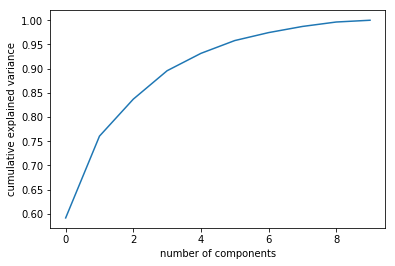

In [145]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [31]:
df_bench = []
for i in range(1,16): 
    df_bench_task = pd.read_csv('../data/Task '+str(i)+'/benchmark'+str(i)+'_W.csv', 
                                header=0,
                                usecols=range(101),
                                names=['wf', 'datetime']+[j for j in range(1,100)])
    df_bench_task['datetime'] = pd.to_datetime(df_bench_task['datetime'], format='%Y%m%d %H:%M')
    df_bench_task.index = df_bench_task['datetime']
    df_bench_task = df_bench_task.drop(['datetime'], axis=1)
    df_bench_task = df_bench_task.pivot(columns='wf')
    df_bench_task = df_bench_task.swaplevel(i=0, j=1, axis=1)
    df_bench.append(df_bench_task)
df_bench = pd.concat(df_bench, axis=0, join='outer')

In [32]:
print(df_bench.index[0])
print(df_bench.index[-1])
df_bench.head()

2012-10-01 01:00:00
2014-01-01 00:00:00


wf,1,2,3,4,5,6,7,8,9,10,...,1,2,3,4,5,6,7,8,9,10
,1,1,1,1,1,1,1,1,1,1,...,99,99,99,99,99,99,99,99,99,99
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 01:00:00,0,0,0,0,0,0,0,0,0,0,...,0.984776,0.932325,0.971574,0.995274,0.989199,0.994617,0.919531,0.922071,0.981716,0.992037
2012-10-01 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0.984776,0.932325,0.971574,0.995274,0.989199,0.994617,0.919531,0.922071,0.981716,0.992037
2012-10-01 03:00:00,0,0,0,0,0,0,0,0,0,0,...,0.984776,0.932325,0.971574,0.995274,0.989199,0.994617,0.919531,0.922071,0.981716,0.992037
2012-10-01 04:00:00,0,0,0,0,0,0,0,0,0,0,...,0.984776,0.932325,0.971574,0.995274,0.989199,0.994617,0.919531,0.922071,0.981716,0.992037
2012-10-01 05:00:00,0,0,0,0,0,0,0,0,0,0,...,0.984776,0.932325,0.971574,0.995274,0.989199,0.994617,0.919531,0.922071,0.981716,0.992037


## See benchmark

In [58]:
print(principalDf.index[0])
print(principalDf.index[-1])
principalDf.head()

0
16799


,1,2,3,4,5,6,7,8,9,10
0,-0.328516,-0.463167,0.316811,-0.142951,0.135855,0.173756,-0.128829,-0.048238,-0.026769,-0.007224
1,-0.662729,-0.208988,0.384072,-0.231647,-0.018784,0.079160,-0.091547,0.012694,0.030739,0.024172
2,-0.829239,-0.016846,0.177163,-0.088464,-0.072627,0.058618,-0.106601,0.016585,-0.020649,0.055455
3,-0.902277,0.057578,0.041894,-0.015186,-0.093811,0.033344,-0.129232,0.055808,0.000320,0.075814
4,-0.940027,0.023823,-0.043194,-0.046991,-0.041440,-0.007924,-0.112020,0.079387,0.004167,0.059318


Plot the quantiles for the whole period. 

In [110]:
q = 0.25
for i in range(1,11):
    print(df_bench[i][int(100*q)][0]-df_power[:date_start].quantile(q=q)['wf'+str(i)])

2012-10-01 01:00:00
-0.00011747047142669775
-1.9892022920298125e-05
-4.917583062399866e-05
0.0
-1.1232522195023242e-05
-1.772609635898592e-05
-1.753853850409992e-05
-3.041077883990384e-05
0.0
0.00014515060926599543


In [87]:
for i in range(1,11):
    print(principalDf[:].quantile(q=q)[str(i)]-df_power[:date_start].quantile(q=q)['wf'+str(i)])

-0.6895583526565598
-0.3361910878159396
-0.3115496840084737
-0.20797718435301613
-0.22893502354407191
-0.2129184550016306
-0.13378114029511182
-0.10593364630974078
-0.043976217447810564
-0.1435646796750439
